# Inspect User to Test DQN

In [2]:
import pandas as pd
import numpy as np

In [52]:
DATA = pd.read_csv('../data/6897-1y-c.csv')

## Preprocessing
### Handle Username Formats

def replace_invalid(string):
  string = string.replace('-', '')
  string = string.replace('/', '')
  string = string.replace('*', '')
  string = string.replace(' ', '')
  string = string.replace('劉德玲', '')
  return string

DATA['聯絡電話'] = DATA['聯絡電話'].apply(replace_invalid)

---

In [53]:
DATA.groupby(['聯絡電話']).count().describe()

,下單日期,商品名稱,規格,單價,數量,折扣,總金額,專屬折扣,運費,信用卡手續費,紅利折抵,收款金額,付款方式,運送方式,收件人,寄送地址,場次,處理後名稱,商品分類
count,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000,11778.000000
mean,24.488283,24.488283,8.965020,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.488283,24.486246,23.592800,24.488283,23.131347
std,43.672649,43.672649,16.405497,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672649,43.672045,42.041028,43.672649,41.265072
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,4.000000,4.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
50%,9.000000,9.000000,4.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,26.000000,26.000000,10.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,25.000000,26.000000,24.000000
max,765.000000,765.000000,350.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,715.000000,765.000000,729.000000


---

In [54]:
user_count = DATA.groupby(['聯絡電話']).count()

uid=user_count['下單日期'].loc[user_count['下單日期'] > 9].index

DATA_9 = DATA.loc[DATA['聯絡電話'].isin(uid)]

In [58]:
USER_COUNT = DATA.groupby(['聯絡電話']).count()
  
def filter_user_by_buycount(threshold):

  uid = USER_COUNT['下單日期'].loc[USER_COUNT['下單日期'] > threshold].index

  return DATA.loc[DATA['聯絡電話'].isin(uid)]

In [59]:
DATA9 = filter_user_by_buycount(9)
DATA15 = filter_user_by_buycount(15)
DATA25 = filter_user_by_buycount(25)

In [65]:
DATA25.groupby(['聯絡電話']).count().describe()

,下單日期,商品名稱,規格,單價,數量,折扣,總金額,專屬折扣,運費,信用卡手續費,紅利折抵,收款金額,付款方式,運送方式,收件人,寄送地址,場次,處理後名稱,商品分類
count,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,73.216550,73.216550,25.990991,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.216550,73.211545,70.582249,73.216550,69.210210
std,64.741337,64.741337,25.311469,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.741337,64.742521,62.208463,64.741337,61.124584
min,26.000000,26.000000,1.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,16.000000,26.000000,19.000000
25%,34.000000,34.000000,12.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,33.000000,34.000000,33.000000
50%,51.000000,51.000000,18.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,49.000000,51.000000,48.000000
75%,85.000000,85.000000,31.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,82.000000,85.000000,81.000000
max,765.000000,765.000000,350.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,715.000000,765.000000,729.000000


In [4]:
ORIGIN_DATA = pd.read_pickle('../data/new_txn.pkl')
DATA = ORIGIN_DATA.reset_index(drop=True)

In [6]:
DATA.columns

Index(['訂單編號', '下單日期', '時間戳記', 'psid', 'asid', 'user_id', 'channel_name',
       '商品id', '商品名稱', '樣式', '規格', '單價', '數量', '折扣', '總金額', '付款單號', '專屬折扣',
       '運費', '收款金額', '付款方式', '運送方式', '寄送地址', '場次', 'date', 'item_name'],
      dtype='object')

In [11]:
asid_uniq_userid = DATA[['asid', 'user_id']].groupby(['asid'])['user_id'].nunique()

In [19]:
unique, counts = np.unique(asid_uniq_userid, return_counts=True)

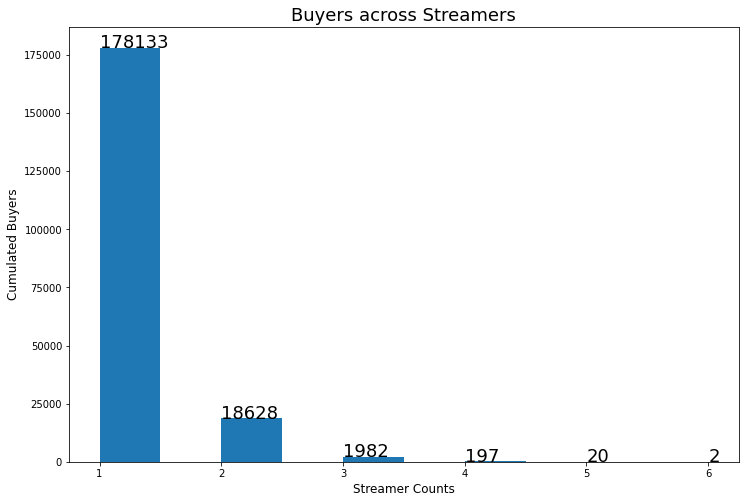

In [55]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12,8))
plt.hist(asid_uniq_userid)
plt.xticks(unique)
plt.xlabel('Streamer Counts', size=12)
plt.ylabel('Cumulated Buyers', size=12)
plt.title('Buyers across Streamers', size=18)
for i in range(6):
  ax.text(unique[i], counts[i], counts[i], size=18)

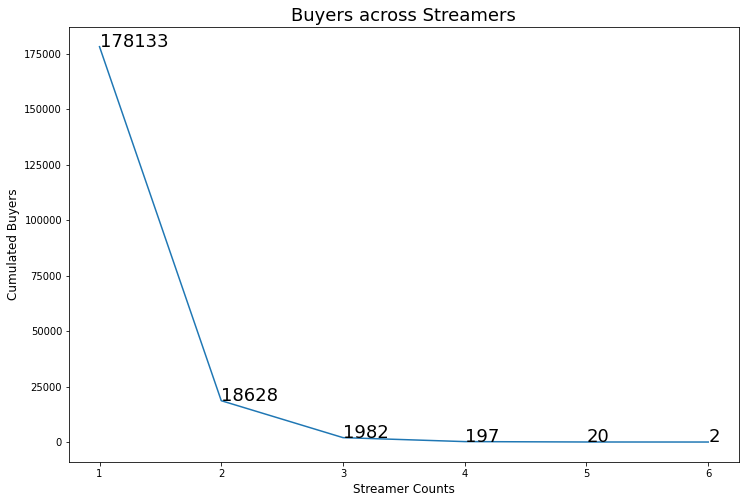

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(counts)
plt.xticks(range(6), unique)
plt.xlabel('Streamer Counts', size=12)
plt.ylabel('Cumulated Buyers', size=12)
plt.title('Buyers across Streamers', size=18)
for i in range(6):
  ax.text(i, counts[i], counts[i], size=18)